In [3]:
import pandas as pd
import numpy as np
import datetime
from matplotlib import dates
from matplotlib import pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime

def to_correct_time(df):
    tot_rows = df.shape[0]
    for date_cell in range(0,tot_rows): 
        date_str = df.iloc[date_cell,1]
        date_format = '%d.%m.%Y %H:%M'
        date_obj = datetime.strptime(date_str, date_format)
        df.iloc[date_cell,1] = date_obj

In [60]:
PABS_1_1 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod01__18-10-18.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_1_1)

PABS_1_2 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod01__19-10-13.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_1_2)

PABS_1_3 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod01__20-10-16.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_1_3)

In [63]:
PABS_2_1 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod02__18-10-20.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_2_1)

PABS_2_2 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod02__19-10-13.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_2_2)

PABS_2_3 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod02__20-10-16.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_2_3)

In [7]:
PABS_5_1 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod05__18-10-21.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_5_1)

PABS_5_2 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod05__19-10-16.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_5_2)

PABS_5_3 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod05__20-10-17.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_5_3)

In [11]:
PABS_10_1 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod10__18-10-15.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_10_1)

PABS_10_2 = pd.DataFrame(pd.read_csv('D:/ИТМО/Python/vosaline_votemper/data/mod10__19-10-10.csv', sep=';',decimal='.', encoding='latin-1'))
to_correct_time(PABS_10_2)

### Разные глубины для одного ПАБС

In [56]:
df_main = PABS_10_2
df_main_name = "mod10__19-10-10"  

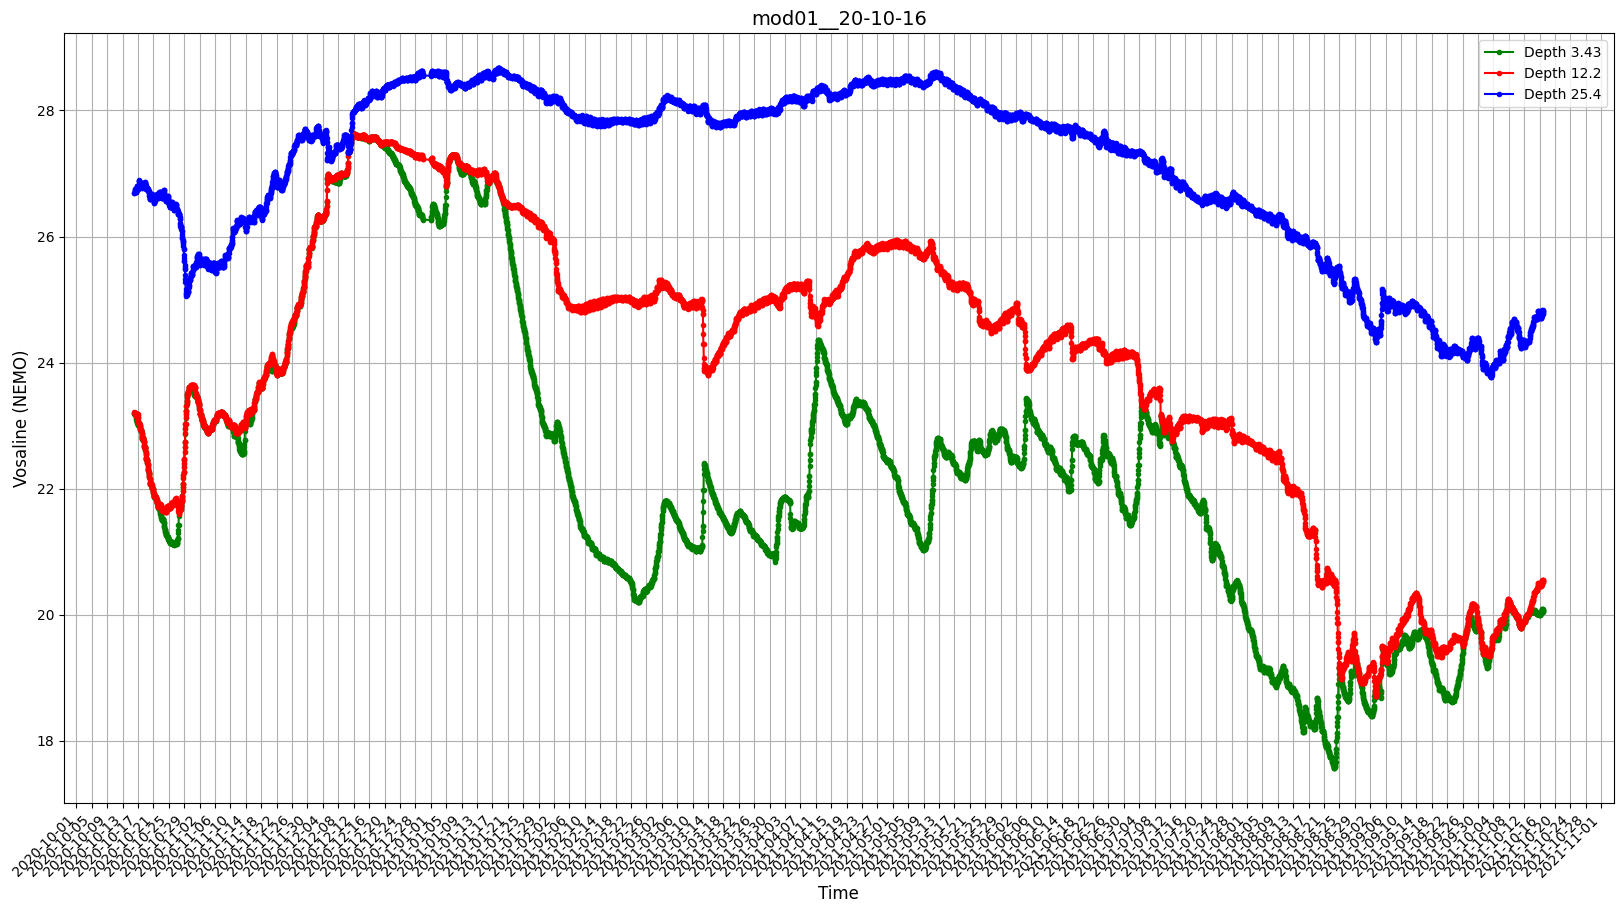

In [28]:
x = df_main['time']


y_3_43 = df_main['vosaline-3.437535047531128-value']
y_12_2 = df_main['vosaline-12.217730522155762-value'] 
y_25_4 = df_main['vosaline-25.442398071289062-value'] 
#y_47_09 = df_main['vosaline-47.092769622802734-value']                # leave for pabs 5, 10

fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(x, y_3_43, color="g", label='Depth 3.43', marker = '.')  
plt.plot(x, y_12_2, color='r', label='Depth 12.2', marker = '.')   
plt.plot(x, y_25_4, color='b', label='Depth 25.4', marker = '.')
#plt.plot(x, y_47_09, color='c', label='Depth 47.09', marker = '.')      # leave for pabs 5, 10

ax.xaxis.set_major_locator(dates.DayLocator(interval=4))  # for days
#ax.xaxis.set_major_locator(dates.MonthLocator(interval=5, bymonthday=3))   # for month revert bymonthday=-1
plt.xticks(rotation=45, ha='right')  

plt.xlabel("Time", fontsize=12)   
plt.ylabel((f'Vosaline (NEMO)'), fontsize=12)    
plt.title(f"{df_main_name}", fontsize=14)                                 
plt.grid()
plt.legend()
plt.savefig(f'D:/ИТМО/Python/vosaline_votemper/check_vosaline/Разные глубины для каждого ПАБС/{df_main_name}_Vosaline') 
plt.show()        

#### Осредненные глубины для одной ПАБС

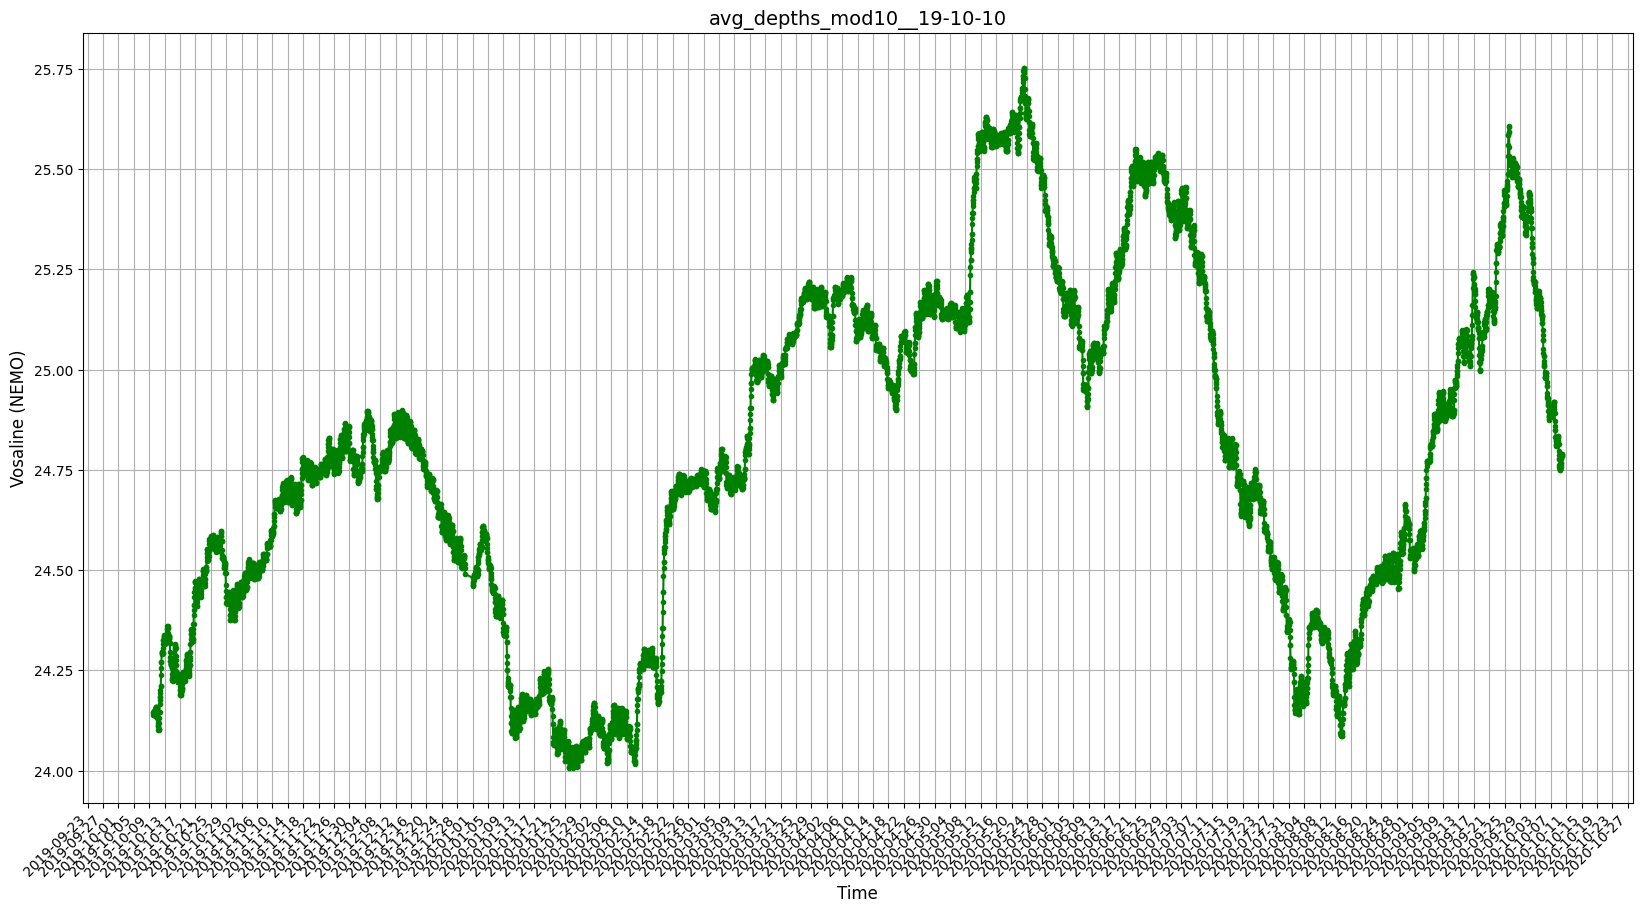

In [57]:
x = df_main['time']     # change above 

vosaline = df_main.iloc[:,2:5].mean(axis = 1)

fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(x, vosaline, color="g", marker = '.')  

ax.xaxis.set_major_locator(dates.DayLocator(interval=4))  # for days
#ax.xaxis.set_major_locator(dates.MonthLocator(interval=5, bymonthday=3))   # for month revert bymonthday=-1
plt.xticks(rotation=45, ha='right')  

plt.xlabel("Time", fontsize=12)   
plt.ylabel((f'Vosaline (NEMO)'), fontsize=12)    
plt.title(f"avg_depths_{df_main_name}", fontsize=14)                                 
plt.grid()
plt.savefig(f'D:/ИТМО/Python/vosaline_votemper/check_vosaline/Осредненные глубины дла одной ПАБС/avg_depths_{df_main_name}_Vosaline') 
plt.show()        

#### Осредненные ПАБС для разных глубин

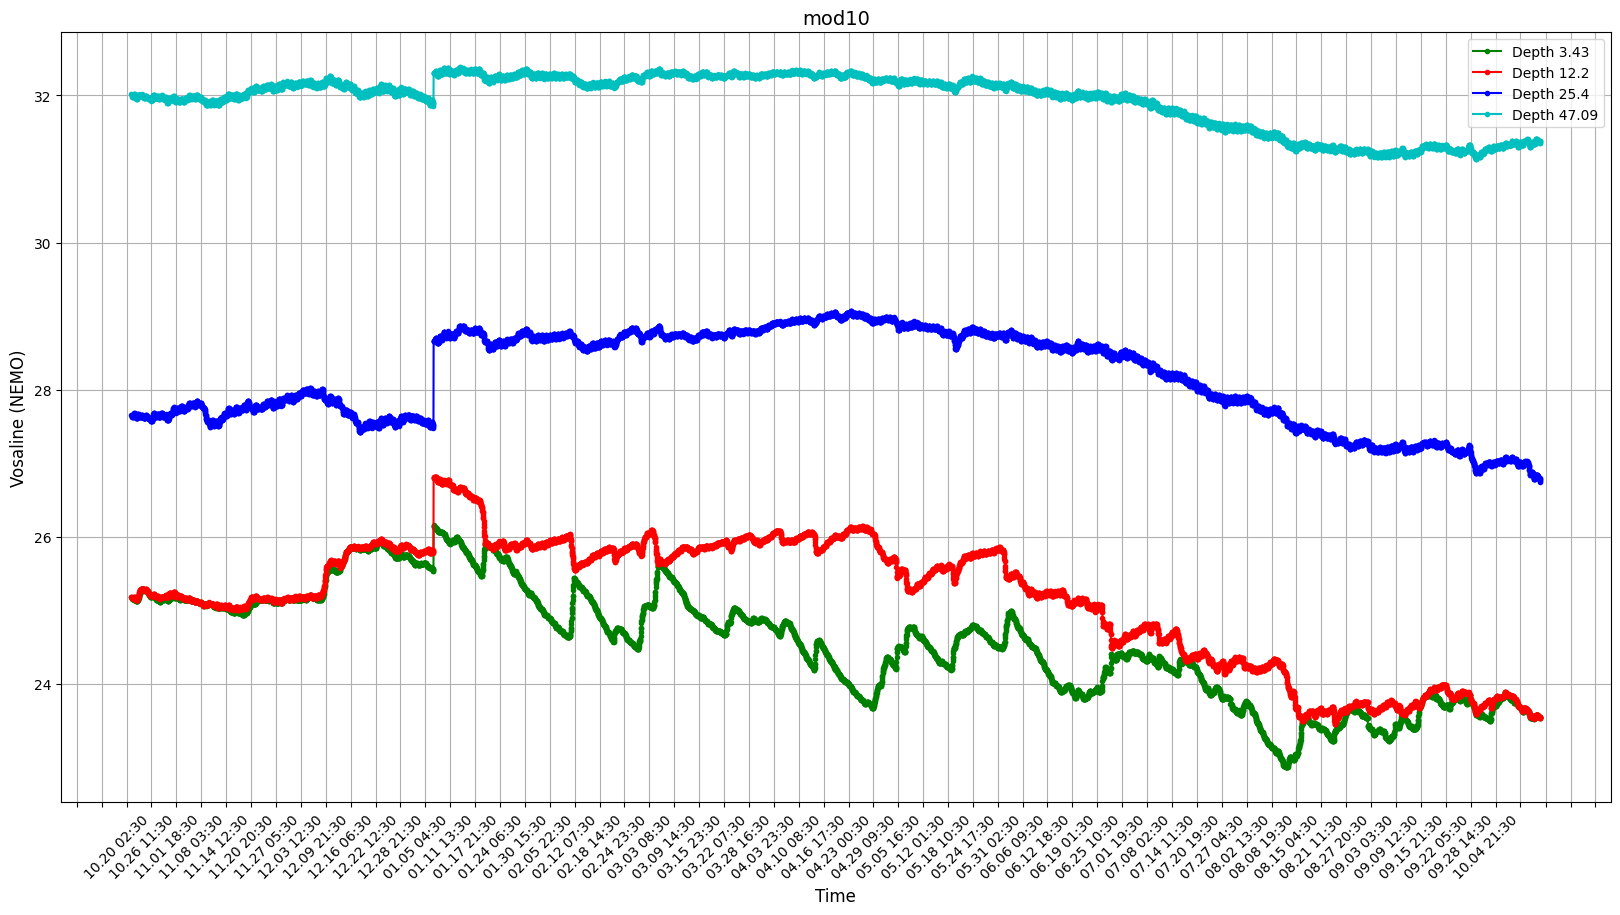

In [12]:
# Тк даты разные, выкидываем год из времени и осредняем по месяцам
name = 'mod10'                    # поменять на 01, 02, 05, 10
# Ниже поменять PABS под name, target1 = та, у которой наименьший период наблюдения
target1 = PABS_10_1                # для каждой - первая пабс
target2 = PABS_10_2.drop('time', axis = 1)
#target3 = PABS_5_3.drop('time', axis = 1)     # для Пабс 10 убрать
target1['time'] = pd.to_datetime(target1['time'])     # если что перезапустить ПАБС с путями выше
target1['time'] = target1['time'].dt.strftime('%m.%d %H:%M')

x = target1['time']
i = 6                                               # для Пабс 5 и 10 i = 6
#y = pd.concat([target1.iloc[0:,:i], target2.iloc[0:,:i-1], target3.iloc[0:,:i-1]], axis=1)       # для Пабс 10 закомменить 
y = pd.concat([target1.iloc[0:,:i], target2.iloc[0:,:i-1]], axis=1)                             # для Пабс 10 раскомментить
y = y.dropna()
y = y.drop(['Unnamed: 0'], axis = 1)
y1 = y.drop(['time'], axis = 1)
merged = y1.groupby(by=y1.columns, axis=1).mean()
y = pd.concat([y.time, merged], axis=1)

fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(x, y['vosaline-3.437535047531128-value'], color="g", label='Depth 3.43', marker = '.')  
plt.plot(x, y['vosaline-12.217730522155762-value'], color='r', label='Depth 12.2', marker = '.')   
plt.plot(x, y['vosaline-25.442398071289062-value'], color='b', label='Depth 25.4', marker = '.')
plt.plot(x, y['vosaline-47.092769622802734-value'], color='c', label='Depth 47.09', marker = '.')      # для Пабс 5 и 10 раскомментить

ax.xaxis.set_major_locator(dates.MonthLocator(interval=5, bymonthday=3))   # for month revert bymonthday=-1
plt.xticks(rotation=45, ha='right')  

plt.xlabel("Time", fontsize=12)   
plt.ylabel((f'Vosaline (NEMO)'), fontsize=12)    
plt.title(f"{name}", fontsize=14)                                 
plt.grid()
plt.legend()
plt.savefig(f'D:/ИТМО/Python/vosaline_votemper/check_vosaline/Осредненные ПАБС для разных глубин/{name}_Vosaline') 
plt.show()        

### Проверка аномалии за период 

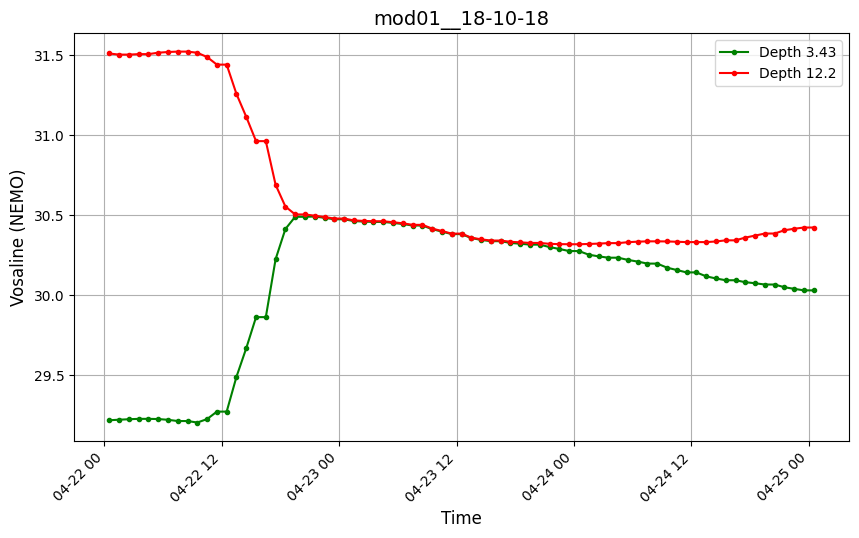

In [7]:
#choosing values of chosen dates
df_main['time'] = pd.to_datetime(df_main['time'])        
slice = df_main.loc[(df_main['time'] >= '2019-04-22 00:30:00') & (df_main['time'] <= '2019-04-25 00:30:00')] #%Y-%m-%d %H:%M:%S

x1 = slice.iloc[:,1]

y_3_43 = slice.iloc[:,2]
y_12_2 = slice.iloc[:,3]

fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(x1, y_3_43, color="g", label='Depth 3.43', marker = '.')  
plt.plot(x1, y_12_2, color='r', label='Depth 12.2', marker = '.')   

plt.gcf().autofmt_xdate(rotation=90)
plt.xticks(rotation=45, ha='right')  

plt.xlabel("Time", fontsize=12)   
plt.ylabel((f'Vosaline (NEMO)'), fontsize=12)    
plt.title(f"{df_main_name}", fontsize=14)                                 
plt.grid()
plt.legend()

### Разные ПАБС для одной глубины

In [70]:
a = 'mod10__18-10-15'
b = 'mod10__19-10-10'
#c = 

##### Для глубины 3_43

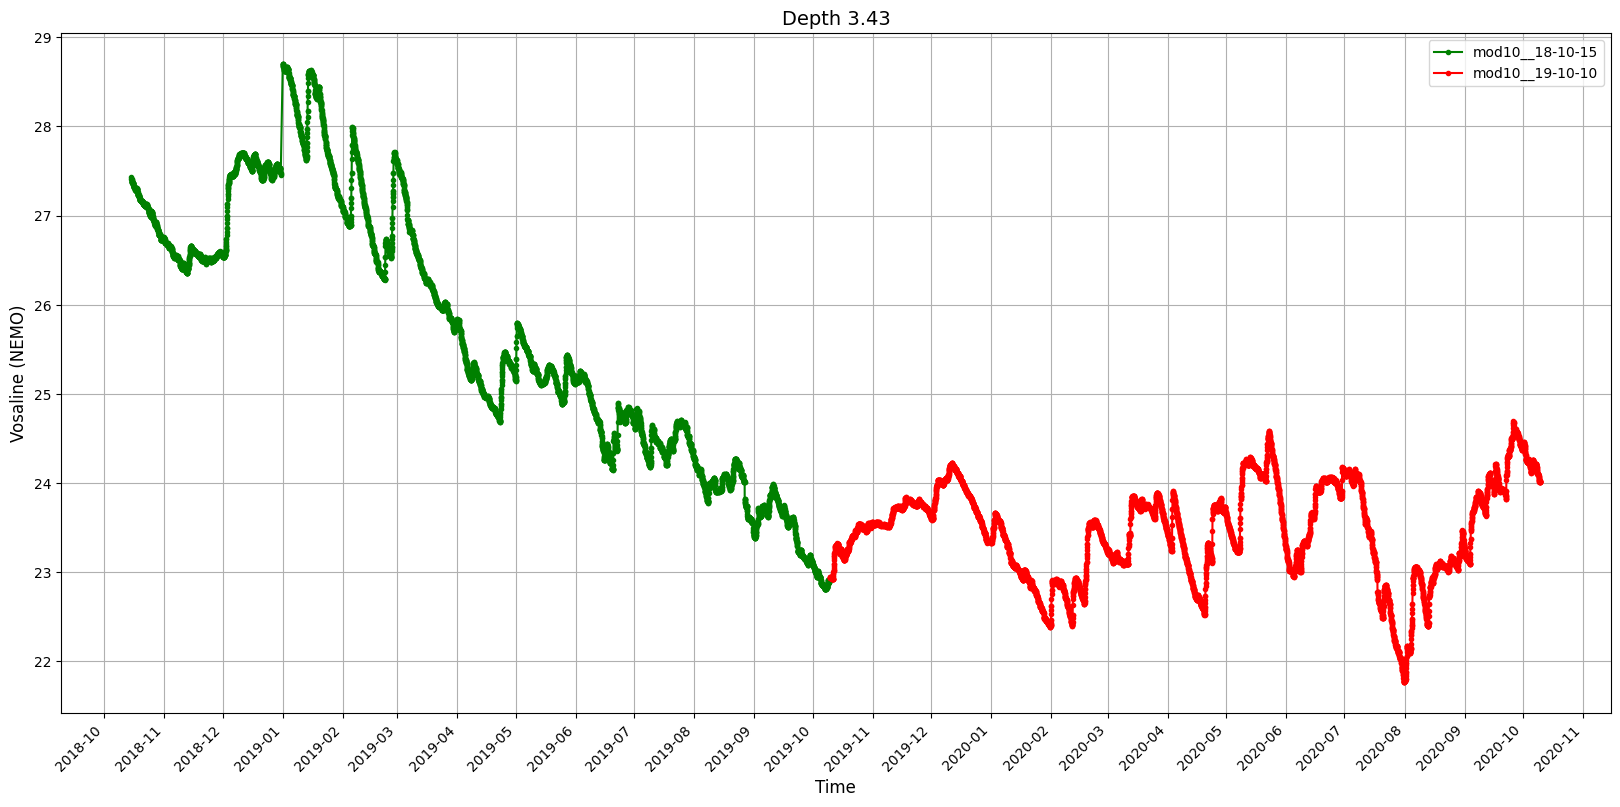

In [71]:
x_p_1_1 = PABS_10_1.iloc[:,1]     
x_p_1_2 = PABS_10_2.iloc[:,1]
#x_p_1_3 = PABS_5_3.iloc[:,1]

y_3_43_p_1_1 = PABS_10_1.iloc[:,2].astype(float)    #change
y_3_43_p_1_2 = PABS_10_2.iloc[:,2].astype(float)
#y_3_43_p_1_3 = PABS_5_3.iloc[:,2].astype(float)

fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(x_p_1_1, y_3_43_p_1_1, color="g", label=a, marker = '.')  
plt.plot(x_p_1_2, y_3_43_p_1_2, color='r', label=b, marker = '.')   
#plt.plot(x_p_1_3, y_3_43_p_1_3, color='b', label=c, marker = '.')

plt.gcf().autofmt_xdate(rotation=90)
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1, bymonthday=1))   # for month revert bymonthday=-1
plt.xticks(rotation=45, ha='right')  

plt.xlabel("Time", fontsize=12)   
plt.ylabel((f'Vosaline (NEMO)'), fontsize=12)    
plt.title("Depth 3.43", fontsize=14)                                 
plt.grid()
plt.legend()
plt.savefig(f'D:/ИТМО/Python/vosaline_votemper/check_vosaline/mod10_3_43_Vosaline') #change name mod
plt.show()   

##### Для глубины 12_2

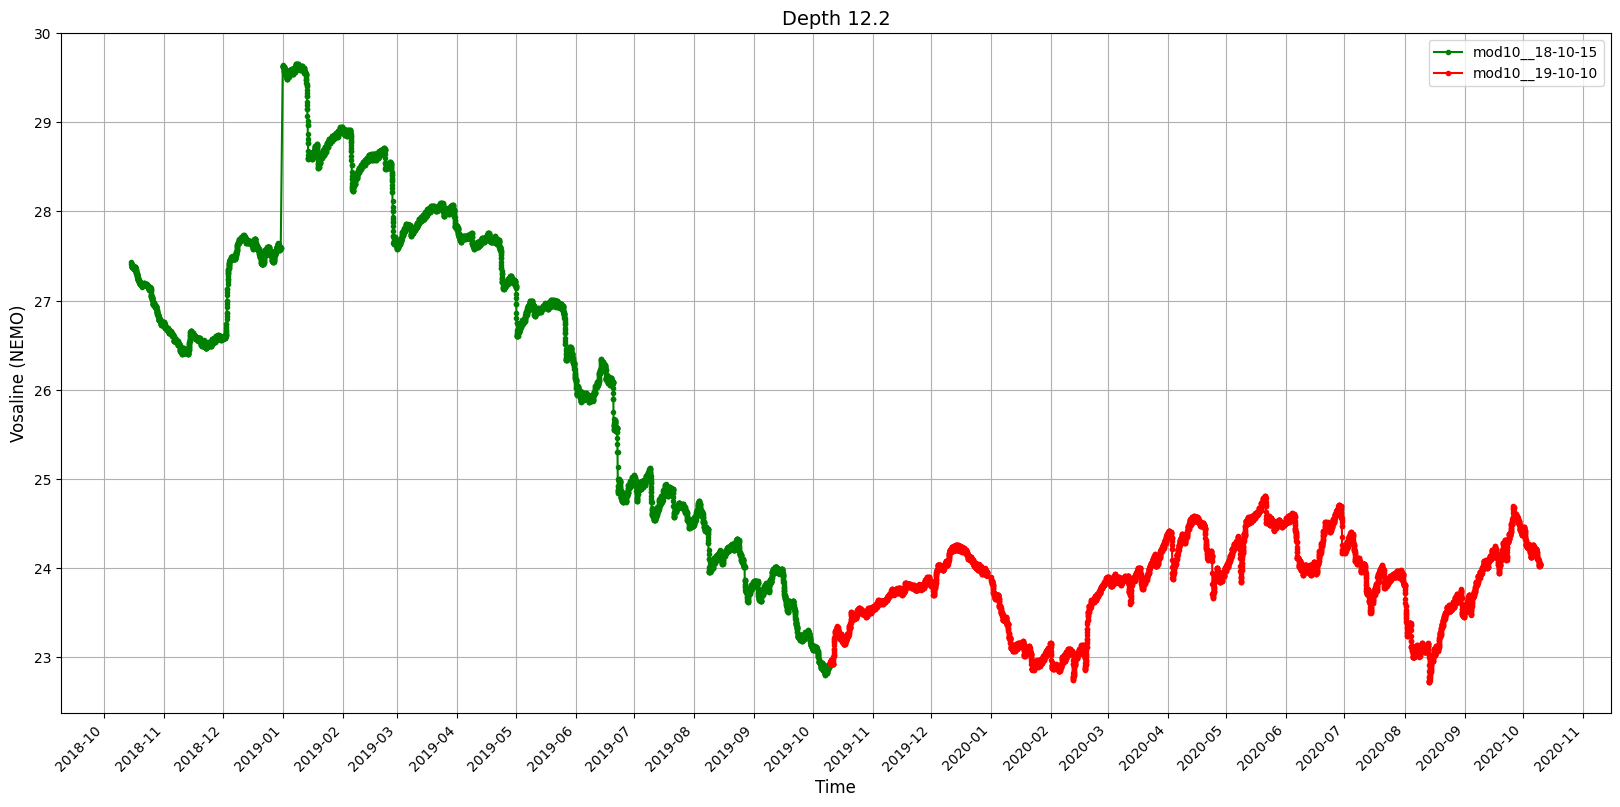

In [72]:
y_12_2_p_1_1 = PABS_10_1.iloc[:,3].astype(float)   #change
y_12_2_p_1_2 = PABS_10_2.iloc[:,3].astype(float)
#y_12_2_p_1_3 = PABS_5_3.iloc[:,3].astype(float)

fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(x_p_1_1, y_12_2_p_1_1, color="g", label=a, marker = '.')  
plt.plot(x_p_1_2, y_12_2_p_1_2, color='r', label=b, marker = '.')   
#plt.plot(x_p_1_3, y_12_2_p_1_3, color='b', label=c, marker = '.')

plt.gcf().autofmt_xdate(rotation=90)
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1, bymonthday=1))   # for month revert bymonthday=-1
plt.xticks(rotation=45, ha='right')  

plt.xlabel("Time", fontsize=12)   
plt.ylabel((f'Vosaline (NEMO)'), fontsize=12)    
plt.title("Depth 12.2", fontsize=14)                                 
plt.grid()
plt.legend()
plt.savefig(f'D:/ИТМО/Python/vosaline_votemper/check_vosaline/mod10_12_2_Vosaline') #change name mod
plt.show()     

##### Для глубины 25_4

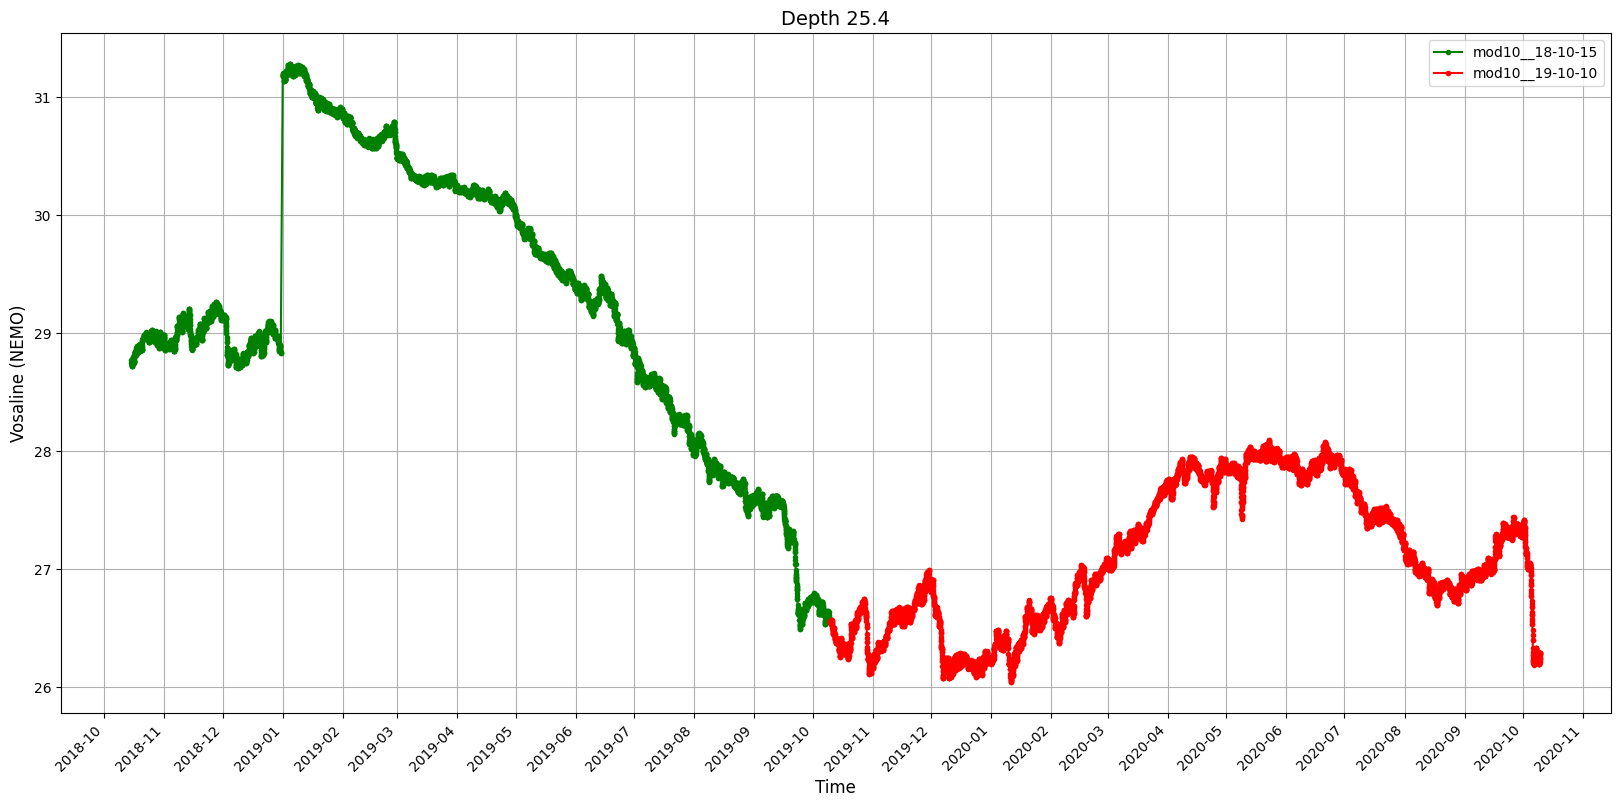

In [73]:
y_25_4_p_1_1 = PABS_10_1.iloc[:,4].astype(float)     #change
y_25_4_p_1_2 = PABS_10_2.iloc[:,4].astype(float)
#y_25_4_p_1_3 = PABS_5_3.iloc[:,4].astype(float)

fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(x_p_1_1, y_25_4_p_1_1, color="g", label=a, marker = '.')  
plt.plot(x_p_1_2, y_25_4_p_1_2, color='r', label=b, marker = '.')   
#plt.plot(x_p_1_3, y_25_4_p_1_3, color='b', label=c, marker = '.')

plt.gcf().autofmt_xdate(rotation=90)
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1, bymonthday=1))   # for month revert bymonthday=-1
plt.xticks(rotation=45, ha='right')  

plt.xlabel("Time", fontsize=12)   
plt.ylabel((f'Vosaline (NEMO)'), fontsize=12)    
plt.title("Depth 25.4", fontsize=14)                                 
plt.grid()
plt.legend()
plt.savefig(f'D:/ИТМО/Python/vosaline_votemper/check_vosaline/mod10_25_4_Vosaline') #change name mod
plt.show()   

##### Для глубины 47_09 - Для ПАБС 5, 10

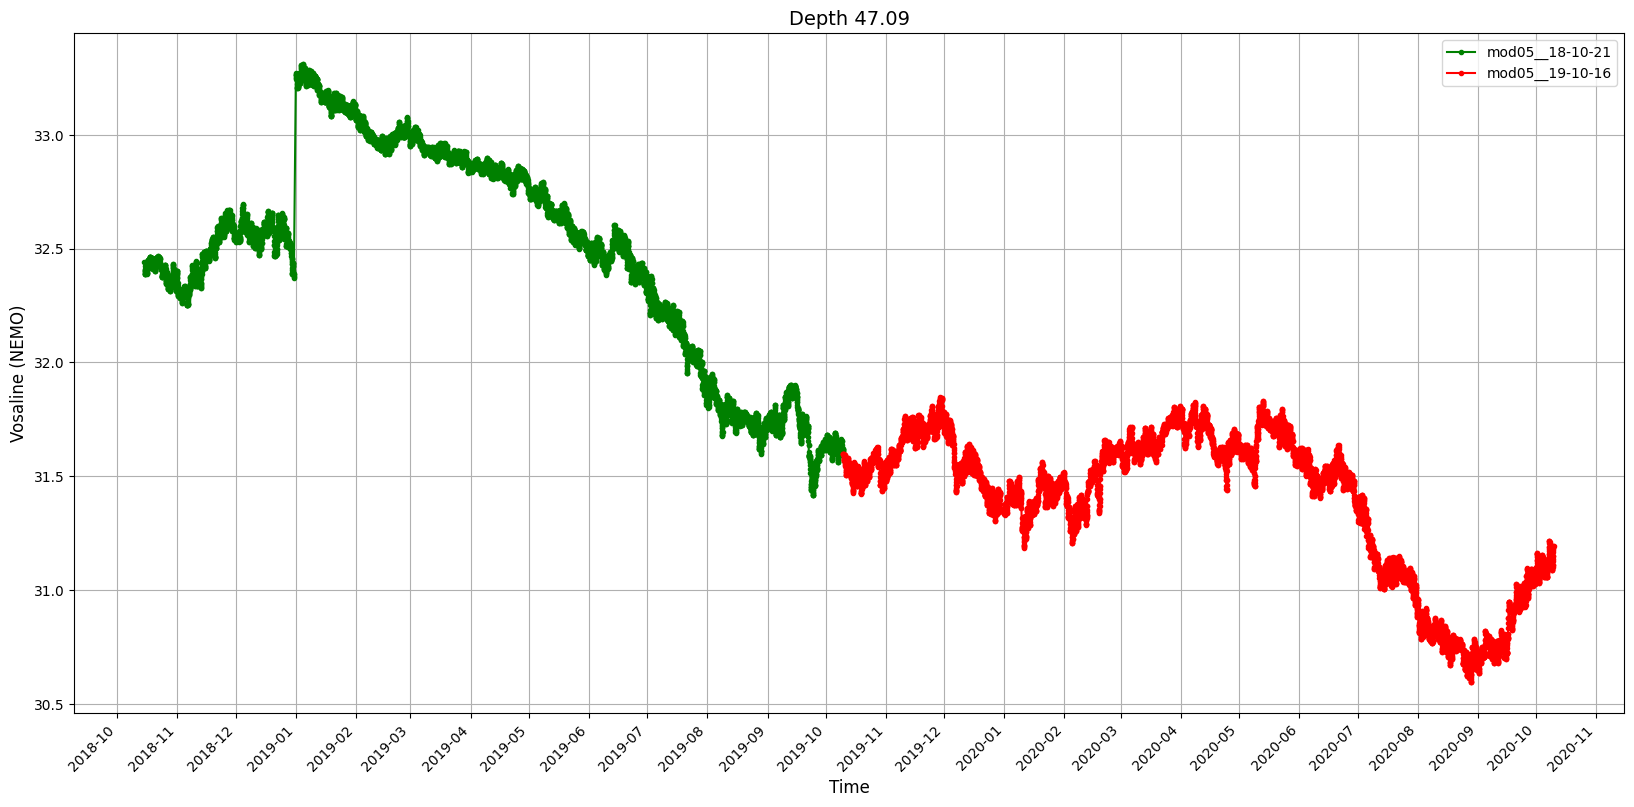

In [74]:
y_47_09_p_1_1 = PABS_10_1.iloc[:,5].astype(float)     #change
y_47_09_p_1_2 = PABS_10_2.iloc[:,5].astype(float)
#y_47_09_p_1_3 = PABS_5_3.iloc[:,5].astype(float)

fig, ax = plt.subplots(figsize=(20, 10))

plt.plot(x_p_1_1, y_47_09_p_1_1, color="g", label='mod05__18-10-21', marker = '.')  
plt.plot(x_p_1_2, y_47_09_p_1_2, color='r', label='mod05__19-10-16', marker = '.')   
#plt.plot(x_p_1_3, y_47_09_p_1_3, color='b', label='mod05__20-10-17', marker = '.')

plt.gcf().autofmt_xdate(rotation=90)
ax.xaxis.set_major_locator(dates.MonthLocator(interval=1, bymonthday=1))   # for month revert bymonthday=-1
plt.xticks(rotation=45, ha='right')  

plt.xlabel("Time", fontsize=12)   
plt.ylabel((f'Vosaline (NEMO)'), fontsize=12)    
plt.title("Depth 47.09", fontsize=14)                                 
plt.grid()
plt.legend()
plt.savefig(f'D:/ИТМО/Python/vosaline_votemper/check_vosaline/mod10_47_09_Vosaline') #change name mod
plt.show()   